<a href="https://colab.research.google.com/github/DataEtnos/EDA---DADOS-LOJA-ELETRO-ELETRONICOS/blob/main/EDA_DADOS_LOJA_ELETRO_ELETRONICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

#modelo
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('/content/train.csv', sep=',')
df.tail(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9770,9771,CA-2017-123533,24/11/2017,30/11/2017,Standard Class,SC-20050,Sample Company A,Home Office,United States,Hialeah,Florida,33012.0,South,OFF-PA-10001609,Office Supplies,Paper,Tops Wirebound Message Log Books,10.528
9771,9772,CA-2017-123533,24/11/2017,30/11/2017,Standard Class,SC-20050,Sample Company A,Home Office,United States,Hialeah,Florida,33012.0,South,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,42.384
9772,9773,CA-2017-104983,03/07/2017,03/07/2017,Same Day,FM-14215,Filia McAdams,Corporate,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-PA-10000167,Office Supplies,Paper,Xerox 1925,123.920
9773,9774,CA-2017-160234,26/06/2017,03/07/2017,Standard Class,PF-19225,Phillip Flathmann,Consumer,United States,Atlanta,Georgia,30318.0,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,135.950
9774,9775,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584
9775,9776,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,FUR-FU-10004666,Furniture,Furnishings,DAX Clear Channel Poster Frame,17.496
9776,9777,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10001524,Office Supplies,Binders,GBC Premium Transparent Covers with Diagonal L...,16.784
9777,9778,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,431.136
9778,9779,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10001679,Office Supplies,Binders,GBC Instant Index System for Binding Systems,8.880
9779,9780,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-AP-10003281,Office Supplies,Appliances,Acco 6 Outlet Guardian Standard Surge Suppressor,4.836


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [ ]:


# Converter a coluna 'Ship Date' para datetime (se ainda não estiver)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')


In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9789.000000,9789,9789,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2827.486899,NaN,NaN,32041.223413,625.302079


In [ ]:
df = df.drop('Row ID', axis = 1)
df = df.drop('Order ID', axis = 1)


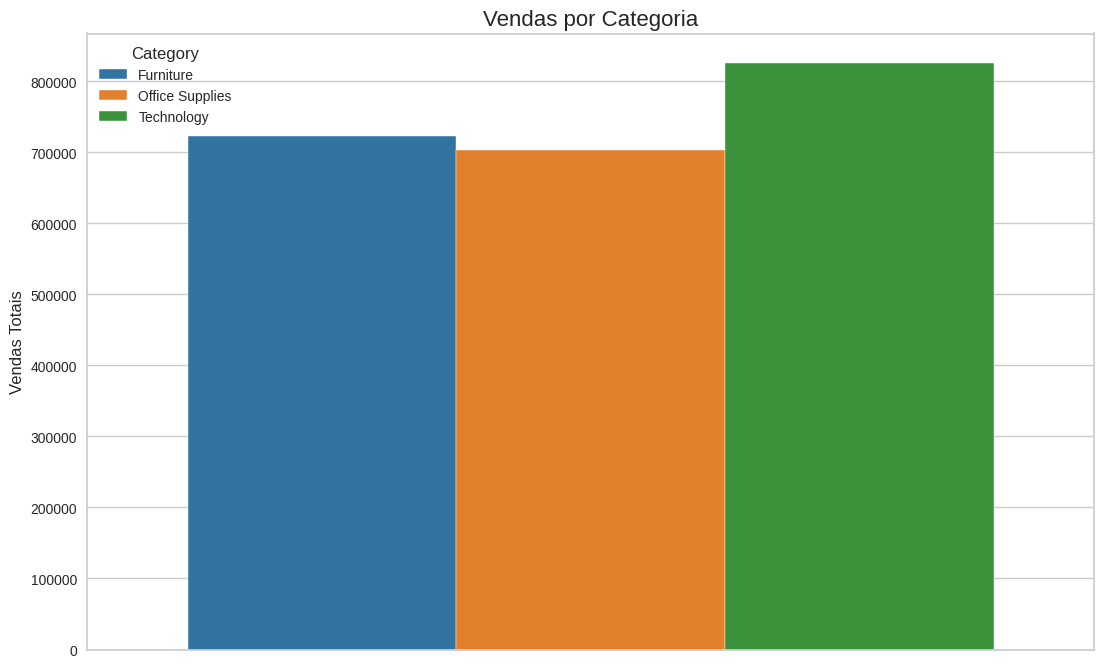

In [ ]:
plt.figure(figsize=(13, 8))
sns.barplot(hue='Category', y='Sales', data=df,estimator=sum, errorbar=None, palette = 'tab10')
plt.title("Vendas por Categoria", fontsize=16)
plt.ylabel("Vendas Totais", fontsize=12)
plt.show()




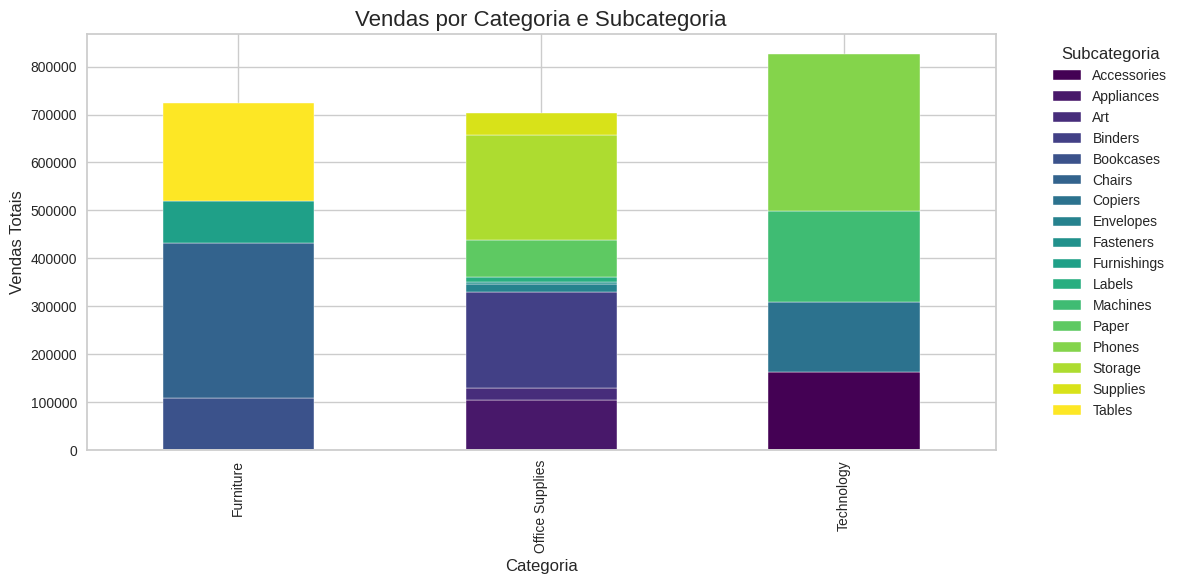

In [ ]:
pivot_data = df.pivot_table(index='Category', columns='Sub-Category', values='Sales', aggfunc='sum')

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Vendas por Categoria e Subcategoria", fontsize=16)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Vendas Totais", fontsize=12)
plt.legend(title="Subcategoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


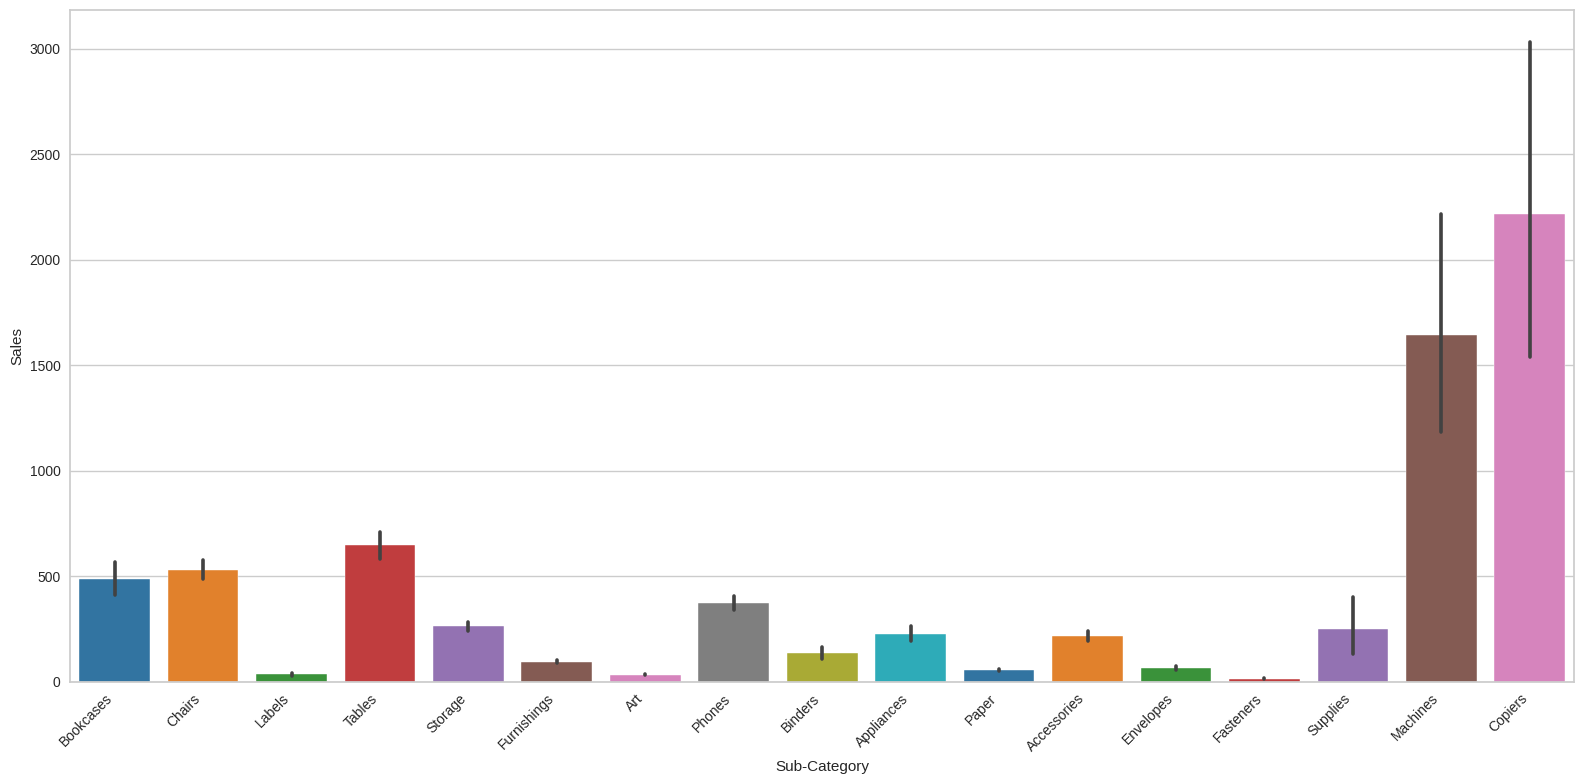

In [ ]:
#Grafifo de  Avaliação de Sub-categorica
plt.figure(figsize=(16, 8))
sns.barplot(x='Sub-Category', y='Sales',hue ='Sub-Category', data=df, palette = 'tab10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

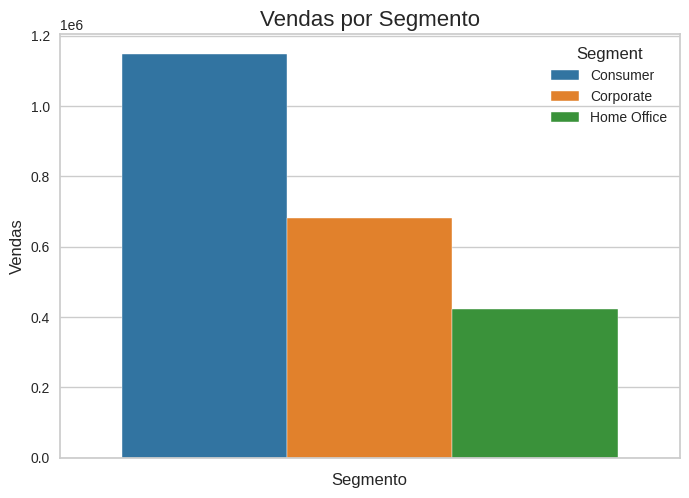

In [ ]:
#Vendas Por Segmento
sns.barplot(hue='Segment', y='Sales', data=df,estimator=sum, errorbar=None, palette = 'tab10')
plt.title("Vendas por Segmento", fontsize=16)
plt.xlabel("Segmento", fontsize=12)
plt.ylabel("Vendas", fontsize=12)
plt.show()



In [ ]:
# Agrupar vendas por data
vendas_por_data = df.groupby('Ship Date')['Sales'].sum().reset_index()

# Ordenar os dados por data
vendas_por_data = vendas_por_data.sort_values(by='Ship Date')

#grafico
fig = px.line(
    vendas_por_data,
    x='Ship Date',
    y='Sales',
    title="Vendas por Data",
    labels={'Ship Date': 'Data', 'Sales': 'Vendas'},
    line_shape='linear',
    template='plotly_white'
)

# Ajustando o layout
fig.update_layout(
    title_font_size=16,
    xaxis=dict(title_font_size=12, tickangle=45),
    yaxis=dict(title_font_size=12),
    width=1200,  # Largura
    height=600   # Altura
)


fig.show()


In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [ ]:
fig = px.scatter(df, x='Region', y='Sales', color='Region',
                 category_orders={'Region': df['Region'].unique()},
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=5, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [ ]:
# retirando o P - MIX  dos produtos
df_produto =  df.groupby('Product Name')['Sales'].sum().reset_index()
df_produto = df_produto.sort_values(by='Sales', ascending=False)
df_produto = df_produto.head(20)

In [ ]:
fig = px.scatter(df_produto, x='Product Name', y='Sales', color='Product Name',
                 category_orders={'Product Name': df_produto['Product Name'].unique()},
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data_final = df['Ship Date'].max()

# Agrupar e calcular as métricas RFV
df_rfv = df.groupby('Customer ID').agg({
    'Ship Date': lambda x: (data_final - x.max()).days,
    'Customer ID': 'count',
    'Sales': 'sum'
}).rename(columns={'Customer ID': 'Frequency','Ship Date':'recency','Sales':'value'})

# Visualizar as primeiras linhas do DataFrame RFV
df_rfv.head(30)

,recency,Frequency,value
Customer ID,,,
AA-10315,185,11,5563.5600
AA-10375,21,15,1056.3900
AA-10480,260,12,1790.5120
AA-10645,57,18,5086.9350
AB-10015,419,6,886.1560
AB-10060,53,18,7755.6200
AB-10105,43,20,14473.5710
AB-10150,45,12,966.7100
AB-10165,27,14,1113.8380


In [ ]:
# Agrupar por mês
df['Ano_mes'] = df['Order Date'].dt.to_period('M')
vendas_mensais = df.groupby('Ano_mes')['Sales'].sum().reset_index()

# Calcular a taxa de crescimento mensal
vendas_mensais['Growth Rate'] = vendas_mensais['Sales'].pct_change() * 100
vendas_mensais['Growth Rate'] = vendas_mensais['Growth Rate'].round(2)


print(vendas_mensais)


    Ano_mes        Sales  Growth Rate
0   2015-01   14205.7070          NaN
1   2015-02    4519.8920       -68.18
2   2015-03   55205.7970      1121.40
3   2015-04   27906.8550       -49.45
4   2015-05   23644.3030       -15.27
5   2015-06   34322.9356        45.16
6   2015-07   33781.5430        -1.58
7   2015-08   27117.5365       -19.73
8   2015-09   81623.5268       201.00
9   2015-10   31453.3930       -61.47
10  2015-11   77907.6607       147.69
11  2015-12   68167.0585       -12.50
12  2016-01   18066.9576       -73.50
13  2016-02   11951.4110       -33.85
14  2016-03   32339.3184       170.59
15  2016-04   34154.4685         5.61
16  2016-05   29959.5305       -12.28
17  2016-06   23599.3740       -21.23
18  2016-07   28608.2590        21.22
19  2016-08   36818.3422        28.70
20  2016-09   63133.6060        71.47
21  2016-10   31011.7375       -50.88
22  2016-11   70129.2995       126.14
23  2016-12   74543.6012         6.29
24  2017-01   16870.1810       -77.37
25  2017-02 

In [ ]:
df['Year'] = df['Order Date'].dt.year
vendas_anuais = df.groupby('Year')['Sales'].sum().reset_index()
vendas_anuais['Growth Rate'] = vendas_anuais['Sales'].pct_change() * 100
vendas_anuais

,Year,Sales,Growth Rate
0,2015,479856.2081,NaN
1,2016,454315.9054,-5.322491
2,2017,597225.4900,31.455994
3,2018,721209.8092,20.760051


In [ ]:
vendas_mensais['Cumulative Sales'] = vendas_mensais['Sales'].cumsum()
vendas_mensais['Cumulative Growth Rate'] = vendas_mensais['Cumulative Sales'].pct_change() * 100
vendas_mensais

,Ano_mes,Sales,Growth Rate,Cumulative Sales,Cumulative Growth Rate
0,2015-01,14205.7070,NaN,1.420571e+04,NaN
1,2015-02,4519.8920,-68.18,1.872560e+04,31.817438
2,2015-03,55205.7970,1121.40,7.393140e+04,294.814585
3,2015-04,27906.8550,-49.45,1.018383e+05,37.746961
4,2015-05,23644.3030,-15.27,1.254826e+05,23.217507
5,2015-06,34322.9356,45.16,1.598055e+05,27.352755
6,2015-07,33781.5430,-1.58,1.935870e+05,21.139163
7,2015-08,27117.5365,-19.73,2.207046e+05,14.007930
8,2015-09,81623.5268,201.00,3.023281e+05,36.983161
9,2015-10,31453.3930,-61.47,3.337815e+05,10.403728


In [ ]:
vendas_mensais_categoria = df.groupby([df['Ano_mes'], 'Category'])['Sales'].sum().reset_index()
vendas_mensais_categoria['Growth Rate'] = vendas_mensais_categoria.groupby('Category')['Sales'].pct_change() * 100
vendas_mensais_categoria

,Ano_mes,Category,Sales,Growth Rate
0,2015-01,Furniture,6217.2770,NaN
1,2015-01,Office Supplies,4845.1400,NaN
2,2015-01,Technology,3143.2900,NaN
3,2015-02,Furniture,1839.6580,-70.410551
4,2015-02,Office Supplies,1071.7240,-77.880433
...,...,...,...,...
139,2018-11,Office Supplies,31472.3370,38.593371
140,2018-11,Technology,49409.1030,50.382304
141,2018-12,Furniture,31407.4668,-15.244870
142,2018-12,Office Supplies,29638.0120,-5.828372


In [ ]:
fig = go.Figure()


for categoria in vendas_mensais_categoria['Category'].unique():
    categoria_data = vendas_mensais_categoria[vendas_mensais_categoria['Category'] == categoria]
    fig.add_trace(go.Scatter(
        x=categoria_data['Ano_mes'].astype(str),
        y=categoria_data['Growth Rate'],
        mode='lines+markers',
        name=categoria
    ))

# Adicionar título e rótulos aos eixos
fig.update_layout(
    title='Taxa de Crescimento Mensal por Categoria',
    xaxis_title='Mês',
    yaxis_title='Taxa de Crescimento (%)',
    xaxis_tickangle=45,
    legend_title='Categoria',
    template='plotly_dark',
    width=1000,
    height=600,
)

# Exibir o gráfico
fig.show()


In [ ]:
df_rfv.describe()

,recency,Frequency,value
count,793.000000,793.000000,793.000000
mean,150.839849,12.344262,2840.614644
std,187.452878,6.161650,2618.950596
min,0.000000,1.000000,4.833000
25%,33.000000,8.000000,1080.751000
50%,78.000000,11.000000,2203.778000
75%,186.000000,16.000000,3644.978000
max,1167.000000,35.000000,25043.050000


<Axes: >

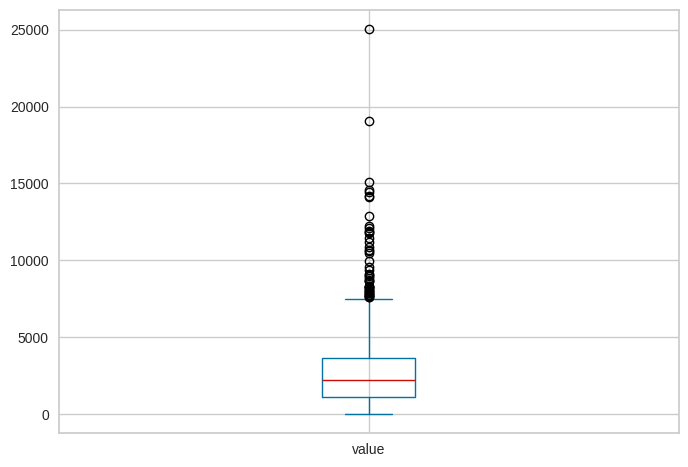

In [ ]:
df_rfv[['value']].plot.box()

<Axes: >

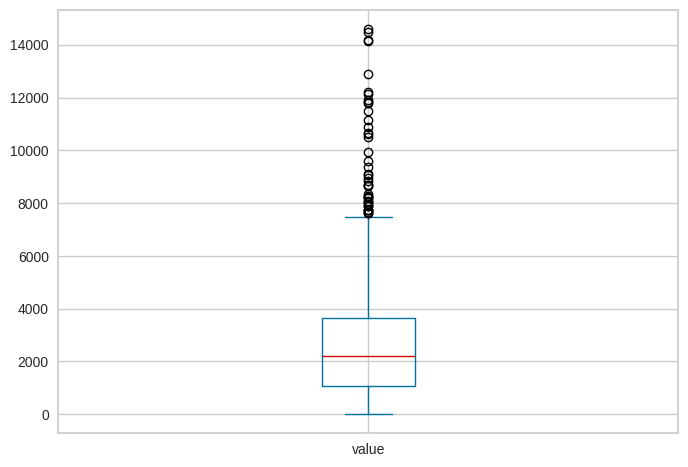

In [ ]:
df_rfv = df_rfv.query('value < 15000')
df_rfv[['value']].plot.box()

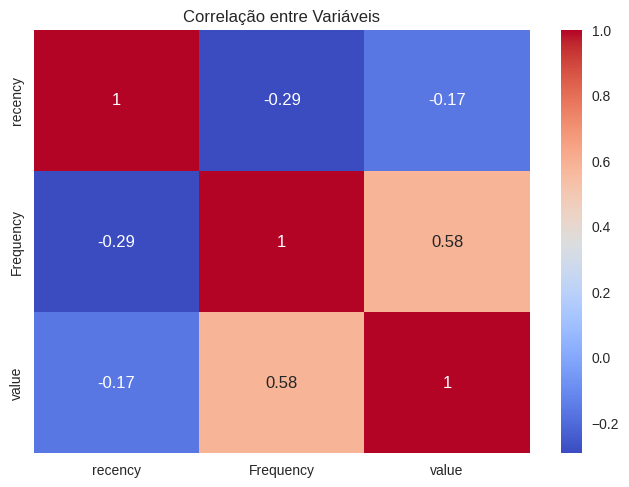

In [ ]:

sns.heatmap(df_rfv[['recency', 'Frequency', 'value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

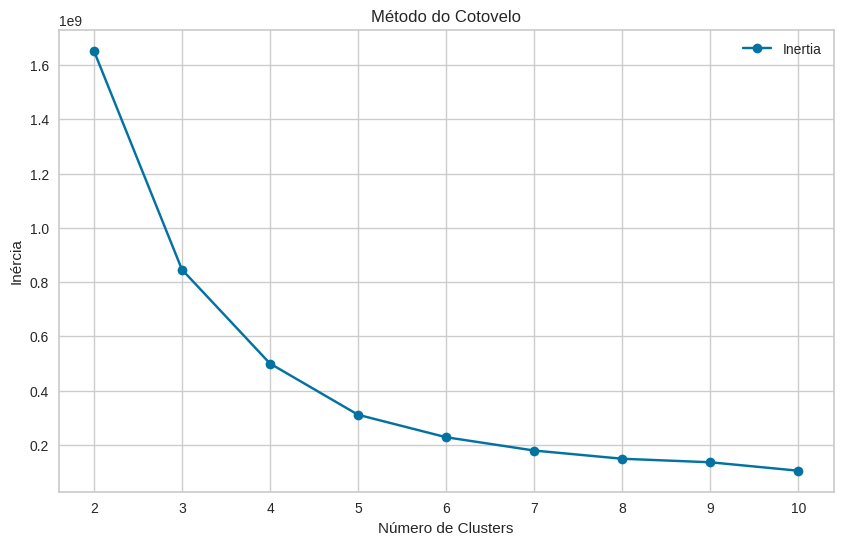

In [ ]:
inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualizar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o', label='Inertia')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.legend()
plt.show()




In [ ]:


# Definir X
X = df_rfv[['recency', 'Frequency', 'value']]

# Lista de modelos
modelos = {
    "KMeans ": KMeans(n_clusters=4, init='random', random_state=42),
    "KMeans++ ": KMeans(n_clusters=4, init='k-means++', random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Clusterização Hierárquica": AgglomerativeClustering(n_clusters=4)
}

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


resultados = {}

for nome, modelo in modelos.items():
    # Ajustar o modelo
    if nome == "DBSCAN":
        clusters = modelo.fit_predict(X_scaled)
    else:
        clusters = modelo.fit_predict(X_scaled)


    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(X_scaled, clusters)
    else:
        silhouette_avg = None

    # Adicionar ao dicionário de resultados
    resultados[nome] = {
        "Modelo": modelo,
        "Clusters": clusters,
        "Silhouette": silhouette_avg
    }

    # Adicionar os clusters ao DataFrame
    df_rfv[nome] = clusters

# Exibir os resultados
for nome, resultado in resultados.items():
    print(f"Modelo: {nome}")
    print(f"Coeficiente de Silhueta: {resultado['Silhouette']}")
    print(f"Número de Clusters: {len(set(resultado['Clusters']))}")
    print("-" * 40)



Modelo: KMeans 
Coeficiente de Silhueta: 0.3504214379650952
Número de Clusters: 4
----------------------------------------
Modelo: KMeans++ 
Coeficiente de Silhueta: 0.34982987962442036
Número de Clusters: 4
----------------------------------------
Modelo: DBSCAN
Coeficiente de Silhueta: 0.10376411623289837
Número de Clusters: 3
----------------------------------------
Modelo: Clusterização Hierárquica
Coeficiente de Silhueta: 0.28329493977155706
Número de Clusters: 4
----------------------------------------


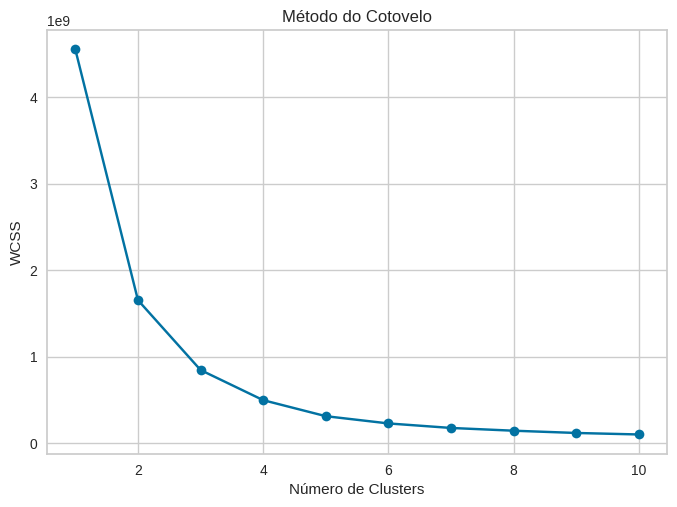

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'K={k}, Silhouette Score: {score:.4f}')


K=2, Silhouette Score: 0.6529
K=3, Silhouette Score: 0.5695
K=4, Silhouette Score: 0.5558
K=5, Silhouette Score: 0.5500
K=6, Silhouette Score: 0.5053
K=7, Silhouette Score: 0.4925
K=8, Silhouette Score: 0.4713
K=9, Silhouette Score: 0.4727
K=10, Silhouette Score: 0.4657


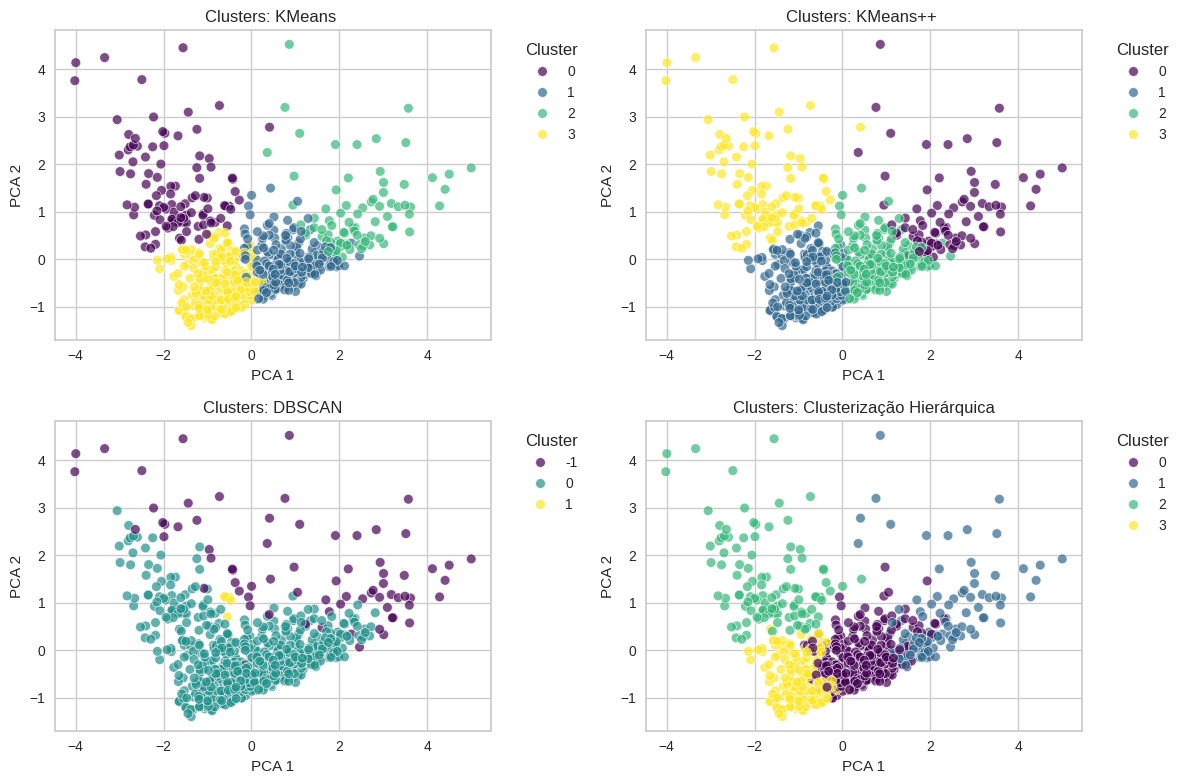

In [ ]:
plt.figure(figsize=(12, 8))

for i, (nome, resultado) in enumerate(resultados.items()):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=resultado['Clusters'], palette='viridis', alpha=0.7)
    plt.title(f"Clusters: {nome}")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
df_rfv.head(10)

,recency,Frequency,value,KMeans,KMeans++,DBSCAN,Clusterização Hierárquica
Customer ID,,,,,,,
AA-10315,185,11,5563.560,1,2,0,0
AA-10375,21,15,1056.390,1,2,0,0
AA-10480,260,12,1790.512,3,1,0,0
AA-10645,57,18,5086.935,1,2,0,1
AB-10015,419,6,886.156,0,3,0,2
AB-10060,53,18,7755.620,2,0,0,0
AB-10105,43,20,14473.571,2,0,-1,1
AB-10150,45,12,966.710,3,1,0,0
AB-10165,27,14,1113.838,3,1,0,0
